In [31]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


aircraft_files = ['Data_Starting_1982.csv', 'Data_Before_1982.csv', 'Codes_For_Data_Before_1982.csv']

# Reading CSV files
data_start_1982 = pd.read_csv(aircraft_files[0])
data_before_1982 = pd.read_csv(aircraft_files[1])
data_codes_before_1982 = pd.read_csv(aircraft_files[2])

# Checking the first few rows of each dataset
print(data_start_1982.head(5))
print(data_before_1982.head(5))
print(data_codes_before_1982.head(5))

   Unnamed: 0      ev_id_left     ev_date  ev_time latitude longitude mid_air  \
0           0  20001204X00000  1999-01-10   1730.0  594421N  1615323W     NaN   
1           1  20001204X00001  1999-01-19    726.0  064541N  0148938W     NaN   
2           2  20001204X00002  1999-01-05   1825.0  061938N  1495927W     NaN   
3           3  20001204X00003  1999-01-10   1751.0  604837N  1615058W     NaN   
4           4  20001204X00004  1999-01-12   1450.0  613151N  0165360W     NaN   

  on_ground_collision light_cond  sky_ceil_ht  ...  wx_int_precip  \
0                 NaN       DAYL       1000.0  ...            NaN   
1                 NaN       NDRK          0.0  ...            NaN   
2                 NaN       DAYL       2500.0  ...            NaN   
3                 NaN       DAYL        600.0  ...            NaN   
4                 NaN       DAWN        700.0  ...            NaN   

   ev_highest_injury     ev_id_right            acft_model  \
0               MINR  20001204X00000

In [36]:
# Inspecting the data info and summary statistics
print(data_start_1982.info())
print(data_before_1982.info())
print(data_codes_before_1982.info())

print(data_start_1982.describe())
print(data_before_1982.describe())
print(data_codes_before_1982.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91517 entries, 0 to 91516
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           91517 non-null  int64  
 1   ev_id_left           91517 non-null  object 
 2   ev_date              91517 non-null  object 
 3   ev_time              90828 non-null  float64
 4   latitude             76861 non-null  object 
 5   longitude            76860 non-null  object 
 6   mid_air              1711 non-null   object 
 7   on_ground_collision  1711 non-null   object 
 8   light_cond           85218 non-null  object 
 9   sky_ceil_ht          91129 non-null  float64
 10  wind_vel_kts         66713 non-null  float64
 11  gust_kts             91230 non-null  float64
 12  altimeter            91129 non-null  float64
 13  wx_int_precip        0 non-null      float64
 14  ev_highest_injury    89828 non-null  object 
 15  ev_id_right          91517 non-null 

In [39]:
# Checking missing values
print("\n Missing Values in Data_Starting_1982")
print(data_start_1982.isnull().sum())

print("\n Missing Values in Data_Before_1982")
print(data_before_1982.isnull().sum())

print("\nMissing values in Codes_For_Data_Before_1982.csv:")
print(data_codes_before_1982.isnull().sum())


 Missing Values in Data_Starting_1982
Unnamed: 0                 0
ev_id_left                 0
ev_date                    0
ev_time                  689
latitude               14656
longitude              14657
mid_air                89806
on_ground_collision    89806
light_cond              6299
sky_ceil_ht              388
wind_vel_kts           24804
gust_kts                 287
altimeter                388
wx_int_precip          91517
ev_highest_injury       1689
ev_id_right                0
acft_model                88
acft_make                 61
damage                  3581
inj_person_count       32826
altitude               28515
finding_description    62988
fuel_on_board          82994
dtype: int64

 Missing Values in Data_Before_1982
Unnamed: 0                 0
RecNum_left                0
DATE_OCCURRENCE            1
TIME_OCCUR                13
LOCATION                   1
LIGHT_COND                34
ALT_OF_OCC             61340
ACFT_MODEL                71
ACFT_MAKE   

In [41]:
#  Check for duplicates and remove them
duplicates_start_1982 = data_start_1982_clean.duplicated().sum()  
duplicates_before_1982 = data_before_1982_clean.duplicated().sum()
duplicates_codes = data_codes_before_1982_clean.duplicated().sum()

# Print the number of duplicate rows before removal
print(f"\nNumber of duplicates before removal (1982 onwards): {duplicates_start_1982}")
print(f"Number of duplicates before removal (Before 1982): {duplicates_before_1982}")
print(f"Number of duplicates before removal (Codes Before 1982): {duplicates_codes}")

# Remove duplicates
data_start_1982_clean = data_start_1982_clean.drop_duplicates()
data_before_1982_clean = data_before_1982_clean.drop_duplicates()
data_codes_before_1982_clean = data_codes_before_1982_clean.drop_duplicates()

# After removing duplicates, check how many duplicates remain
duplicates_start_1982_after = data_start_1982_clean.duplicated().sum()
duplicates_before_1982_after = data_before_1982_clean.duplicated().sum()
duplicates_codes_after = data_codes_before_1982_clean.duplicated().sum()

# Printing the number of duplicates remaining after removal
print(f"Number of duplicates after removal (1982 onwards): {duplicates_start_1982_after}")
print(f"Number of duplicates after removal (Before 1982): {duplicates_before_1982_after}")
print(f"Number of duplicates after removal (Codes Before 1982): {duplicates_codes_after}")


Number of duplicates before removal (1982 onwards): 0
Number of duplicates before removal (Before 1982): 0
Number of duplicates before removal (Codes Before 1982): 0
Number of duplicates after removal (1982 onwards): 0
Number of duplicates after removal (Before 1982): 0
Number of duplicates after removal (Codes Before 1982): 0


In [33]:
# Drop rows with missing values
data_start_1982_clean = data_start_1982.dropna()
data_before_1982_clean = data_before_1982.dropna()
data_codes_before_1982_clean = data_codes_before_1982.dropna()

# Print the number of missing values after dropping rows
print("\nMissing values after dropping rows (1982 onwards):")
print(data_start_1982_clean.isnull().sum())

print("\nMissing values after dropping rows (Before 1982):")
print(data_before_1982_clean.isnull().sum())

print("\nMissing values after dropping rows (Codes Before 1982):")
print(data_codes_before_1982_clean.isnull().sum())


Missing values after dropping rows (1982 onwards):
Unnamed: 0             0
ev_id_left             0
ev_date                0
ev_time                0
latitude               0
longitude              0
mid_air                0
on_ground_collision    0
light_cond             0
sky_ceil_ht            0
wind_vel_kts           0
gust_kts               0
altimeter              0
wx_int_precip          0
ev_highest_injury      0
ev_id_right            0
acft_model             0
acft_make              0
damage                 0
inj_person_count       0
altitude               0
finding_description    0
fuel_on_board          0
dtype: int64

Missing values after dropping rows (Before 1982):
Unnamed: 0             0
RecNum_left            0
DATE_OCCURRENCE        0
TIME_OCCUR             0
LOCATION               0
LIGHT_COND             0
ALT_OF_OCC             0
ACFT_MODEL             0
ACFT_MAKE              0
ACFT_ADAMG             0
ACCIDENT_TYPE1         0
ACCIDENT_TYPE2         0
GRAND_TOT

In [65]:
# Categorical Columns for both data sets 
categorical_columns_start_1982 = data_start_1982.select_dtypes(include=['object', 'category']).columns
categorical_columns_before_1982 = data_before_1982.select_dtypes(include=['object', 'category']).columns

# Numerical Columns for both data sets
numerical_columns_start_1982 = data_start_1982.select_dtypes(include=['int64', 'float64']).columns
numerical_columns_before_1982 = data_before_1982.select_dtypes(include=['int64', 'float64']).columns

# Print the categorized columns for each dataset
print("\nCategorical columns (1982 onwards):", categorical_columns_start_1982)
print("\nCategorical columns (Before 1982):", categorical_columns_before_1982)

print("\nNumerical columns (1982 onwards):", numerical_columns_start_1982)
print("\nNumerical columns (Before 1982):", numerical_columns_before_1982)



Categorical columns (1982 onwards): Index(['ev_id_left', 'ev_date', 'latitude', 'longitude', 'mid_air',
       'on_ground_collision', 'light_cond', 'ev_highest_injury', 'ev_id_right',
       'acft_model', 'acft_make', 'damage', 'finding_description'],
      dtype='object')

Categorical columns (Before 1982): Index(['DATE_OCCURRENCE', 'TIME_OCCUR', 'LOCATION', 'LIGHT_COND', 'ALT_OF_OCC',
       'ACFT_MODEL', 'ACFT_MAKE', 'ACFT_ADAMG', 'ACCIDENT_TYPE1',
       'ACCIDENT_TYPE2', 'CEILING', 'WIND_VELOCITY', 'PRECIPITATION', 'CAUSE',
       'PhaseOfFlight'],
      dtype='object')

Numerical columns (1982 onwards): Index(['Unnamed: 0', 'ev_time', 'sky_ceil_ht', 'wind_vel_kts', 'gust_kts',
       'altimeter', 'wx_int_precip', 'inj_person_count', 'altitude',
       'fuel_on_board'],
      dtype='object')

Numerical columns (Before 1982): Index(['Unnamed: 0', 'RecNum_left', 'GRAND_TOTAL_FATAL', 'GRAND_TOTAL_SERIOUS',
       'GRAND_TOTAL_MINOR', 'GRAND_TOTAL_NONE', 'RecNum_right', 'RecNum',
   

In [72]:
# Identify numerical and categorical columns
data_start_numerical_columns = data_start_1982_clean.select_dtypes(include=['float64', 'int64']).columns
data_start_categorical_columns = data_start_1982_clean.select_dtypes(include=['object']).columns

data_before_numerical_columns = data_before_1982_clean.select_dtypes(include=['float64', 'int64']).columns
data_before_categorical_columns = data_before_1982_clean.select_dtypes(include=['object']).columns


# Calculate mean and median for numerical columns
print("\nMean and Median for data_start_1982_clean:")
print("Mean:\n", data_start_1982_clean[data_start_numerical_columns].mean())
print("Median:\n", data_start_1982_clean[data_start_numerical_columns].median())

print("\nMean and Median for data_before_1982_clean:")
print("Mean:\n", data_before_1982_clean[data_before_numerical_columns].mean())
print("Median:\n", data_before_1982_clean[data_before_numerical_columns].median())



Mean and Median for data_start_1982_clean:
Mean:
 Unnamed: 0     26127.745184
ev_time         1525.395539
sky_ceil_ht     1979.521865
gust_kts           2.514085
altimeter         23.816850
dtype: float64
Median:
 Unnamed: 0     22879.000000
ev_time         1730.000000
sky_ceil_ht        0.000000
gust_kts           0.000000
altimeter         29.870001
dtype: float64

Mean and Median for data_before_1982_clean:
Mean:
 Unnamed: 0             43519.000000
RecNum_left            43520.000000
GRAND_TOTAL_FATAL          0.054700
GRAND_TOTAL_SERIOUS        0.012569
GRAND_TOTAL_MINOR          0.013787
GRAND_TOTAL_NONE           0.172787
RecNum_right           43520.000000
RecNum                 28885.017590
dtype: float64
Median:
 Unnamed: 0             43519.0
RecNum_left            43520.0
GRAND_TOTAL_FATAL          0.0
GRAND_TOTAL_SERIOUS        0.0
GRAND_TOTAL_MINOR          0.0
GRAND_TOTAL_NONE           0.0
RecNum_right           43520.0
RecNum                 28906.0
dtype: float64


In [73]:
# Calculate mode for categorical columns
print("\nMode for data_start_1982_clean:")
print(data_start_1982_clean[data_start_categorical_columns].mode().iloc[0])

print("\nMode for data_before_1982_clean:")
print(data_before_1982_clean[data_before_categorical_columns].mode().iloc[0])




Mode for data_start_1982_clean:
ev_id_left                           20001204X00000
ev_date                                  1983-06-05
latitude                                    332739N
longitude                                  0112457W
light_cond                                     DAYL
ev_highest_injury                              NONE
ev_id_right                          20001212X19172
acft_model                     152                 
acft_make            CESSNA                        
damage                                         SUBS
Name: 0, dtype: object

Mode for data_before_1982_clean:
DATE_OCCURRENCE        1966-07-10
TIME_OCCUR                   1500
LOCATION           ANCHORAGE,ALAS
LIGHT_COND                      B
ACFT_MODEL                  PA-28
ACFT_MAKE                  CESSNA
ACFT_ADAMG                      S
ACCIDENT_TYPE1                  U
CEILING                         U
PRECIPITATION                   L
PhaseOfFlight                  EF
Name: 0, dtype: 

In [78]:
#Dispersion
# Calculate standard deviation for numerical columns
print("\nStandard Deviation for data_start_1982_clean:")
print(data_start_1982_clean[data_start_numerical_columns].std())

print("\nStandard Deviation for data_before_1982_clean:")
print(data_before_1982_clean[data_before_numerical_columns].std())


Standard Deviation for data_start_1982_clean:
Unnamed: 0     17680.590648
ev_time          693.563613
sky_ceil_ht     5384.591610
gust_kts           8.612818
altimeter         87.318444
dtype: float64

Standard Deviation for data_before_1982_clean:
Unnamed: 0             25126.139377
RecNum_left            25126.139377
GRAND_TOTAL_FATAL          3.116661
GRAND_TOTAL_SERIOUS        0.452384
GRAND_TOTAL_MINOR          0.368944
GRAND_TOTAL_NONE           3.839129
RecNum_right           25126.139377
RecNum                 16489.526833
dtype: float64


In [79]:
# Calculate variance for numerical columns
print("\nVariance for data_start_1982_clean:")
print(data_start_1982_clean[data_start_numerical_columns].var())

print("\nVariance for data_before_1982_clean:")
print(data_before_1982_clean[data_before_numerical_columns].var())


Variance for data_start_1982_clean:
Unnamed: 0     3.126033e+08
ev_time        4.810305e+05
sky_ceil_ht    2.899383e+07
gust_kts       7.418064e+01
altimeter      7.624511e+03
dtype: float64

Variance for data_before_1982_clean:
Unnamed: 0             6.313229e+08
RecNum_left            6.313229e+08
GRAND_TOTAL_FATAL      9.713577e+00
GRAND_TOTAL_SERIOUS    2.046515e-01
GRAND_TOTAL_MINOR      1.361198e-01
GRAND_TOTAL_NONE       1.473891e+01
RecNum_right           6.313229e+08
RecNum                 2.719045e+08
dtype: float64


In [80]:
# Function to calculate the 95% confidence interval for each numerical column
def confidence_interval(data, column):
    mean = data[column].mean()
    std = data[column].std()
    n = data[column].count()
    conf_int = stats.t.interval(0.95, n-1, loc=mean, scale=std/np.sqrt(n))
    return conf_int

print("\n95% Confidence Interval for data_start_1982_clean:")
for col in data_start_numerical_columns:
    print(f"{col}: {confidence_interval(data_start_1982_clean, col)}")

print("\n95% Confidence Interval for data_before_1982_clean:")
for col in data_before_numerical_columns:
    print(f"{col}: {confidence_interval(data_before_1982_clean, col)}")


95% Confidence Interval for data_start_1982_clean:
Unnamed: 0: (np.float64(26013.19396457829), np.float64(26242.296403331493))
ev_time: (np.float64(1520.8849804949807), np.float64(1529.9060971462752))
sky_ceil_ht: (np.float64(1944.5613089020205), np.float64(2014.4824203169985))
gust_kts: (np.float64(2.4581957696274714), np.float64(2.569974788303034))
altimeter: (np.float64(23.249916918203585), np.float64(24.38378241241922))

95% Confidence Interval for data_before_1982_clean:
Unnamed: 0: (np.float64(43352.0743989849), np.float64(43685.9256010151))
RecNum_left: (np.float64(43353.0743989849), np.float64(43686.9256010151))
GRAND_TOTAL_FATAL: (np.float64(0.0339945769670964), np.float64(0.07540591477214394))
GRAND_TOTAL_SERIOUS: (np.float64(0.009563789266759253), np.float64(0.015574656010016407))
GRAND_TOTAL_MINOR: (np.float64(0.011335985819559219), np.float64(0.016238177189701105))
GRAND_TOTAL_NONE: (np.float64(0.14728118630124556), np.float64(0.19829201161230944))
RecNum_right: (np.float

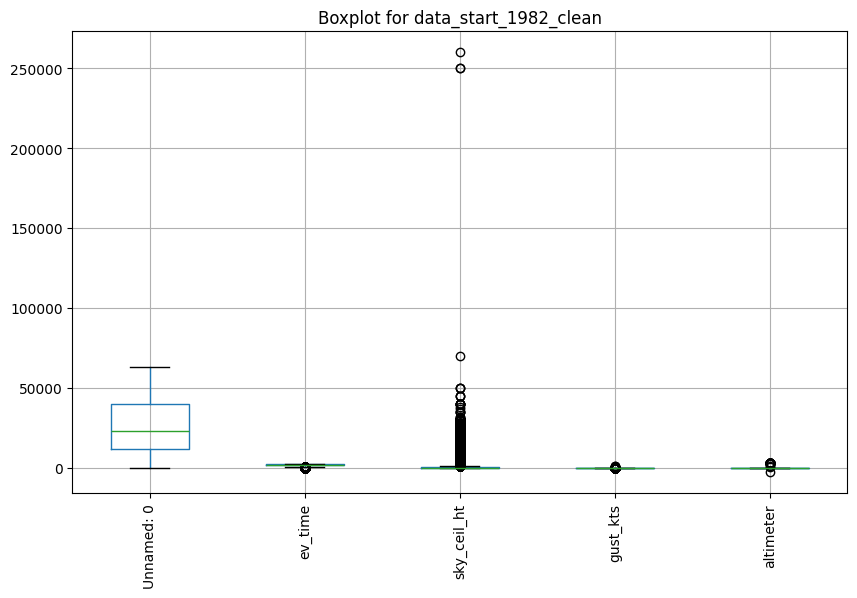

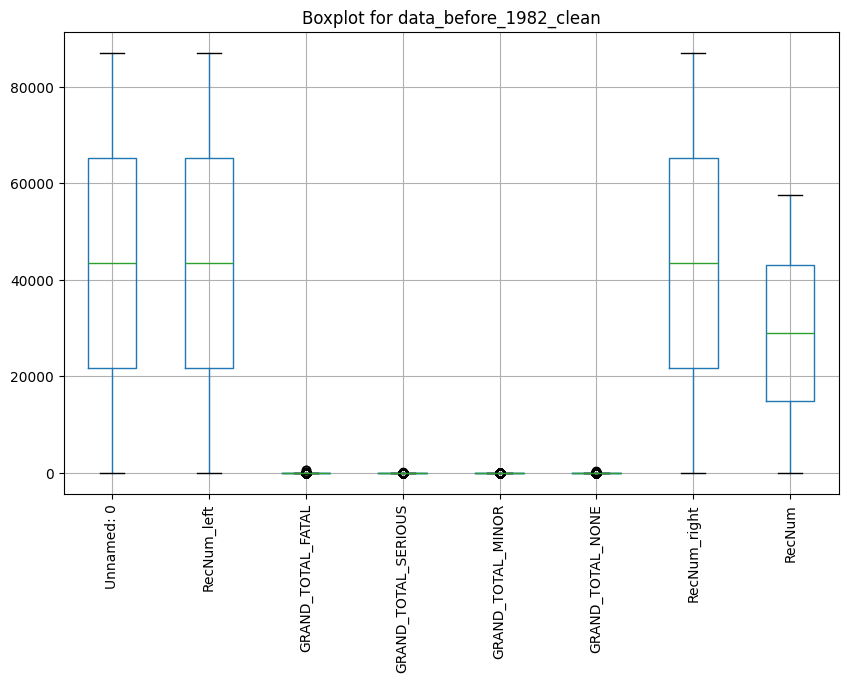

In [82]:
# Boxplot for numerical columns in data_start_1982_clean
plt.figure(figsize=(10, 6))
data_start_1982_clean[data_start_numerical_columns].boxplot()
plt.title("Boxplot for data_start_1982_clean")
plt.xticks(rotation=90)
plt.show()

# Boxplot for numerical columns in data_before_1982_clean
plt.figure(figsize=(10, 6))
data_before_1982_clean[data_before_numerical_columns].boxplot()
plt.title("Boxplot for data_before_1982_clean")
plt.xticks(rotation=90)
plt.show()

In [83]:
# Identify outliers using boxplots
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for col in data_start_numerical_columns:
    outliers = identify_outliers(data_start_1982_clean, col)
    print(f"\nOutliers in {col} for data_start_1982_clean: {outliers.shape[0]} rows")

for col in data_before_numerical_columns:
    outliers = identify_outliers(data_before_1982_clean, col)
    print(f"\nOutliers in {col} for data_before_1982_clean: {outliers.shape[0]} rows")


Outliers in Unnamed: 0 for data_start_1982_clean: 0 rows

Outliers in ev_time for data_start_1982_clean: 11224 rows

Outliers in sky_ceil_ht for data_start_1982_clean: 21134 rows

Outliers in gust_kts for data_start_1982_clean: 11111 rows

Outliers in altimeter for data_start_1982_clean: 79 rows

Outliers in Unnamed: 0 for data_before_1982_clean: 0 rows

Outliers in RecNum_left for data_before_1982_clean: 0 rows

Outliers in GRAND_TOTAL_FATAL for data_before_1982_clean: 886 rows

Outliers in GRAND_TOTAL_SERIOUS for data_before_1982_clean: 499 rows

Outliers in GRAND_TOTAL_MINOR for data_before_1982_clean: 530 rows

Outliers in GRAND_TOTAL_NONE for data_before_1982_clean: 2007 rows

Outliers in RecNum_right for data_before_1982_clean: 0 rows

Outliers in RecNum for data_before_1982_clean: 0 rows


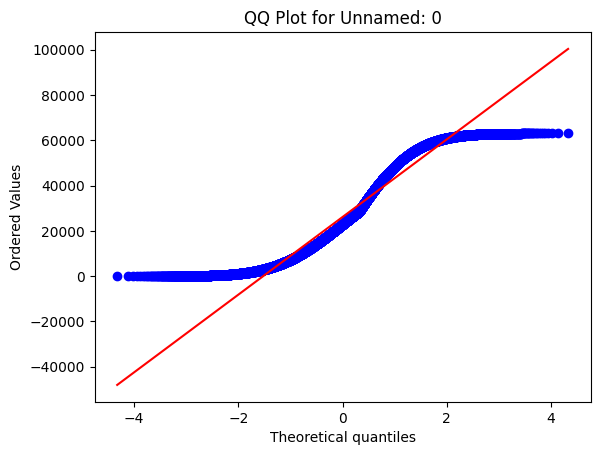

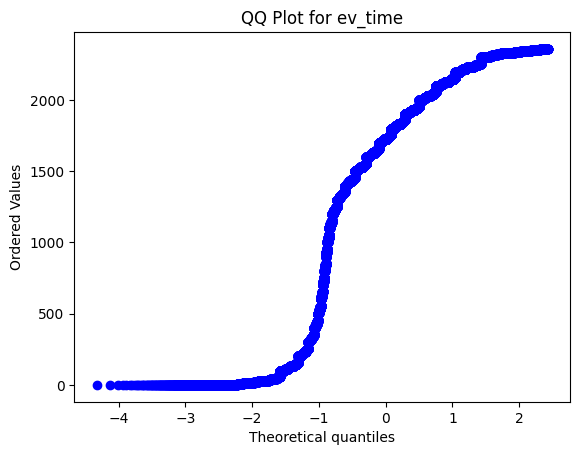

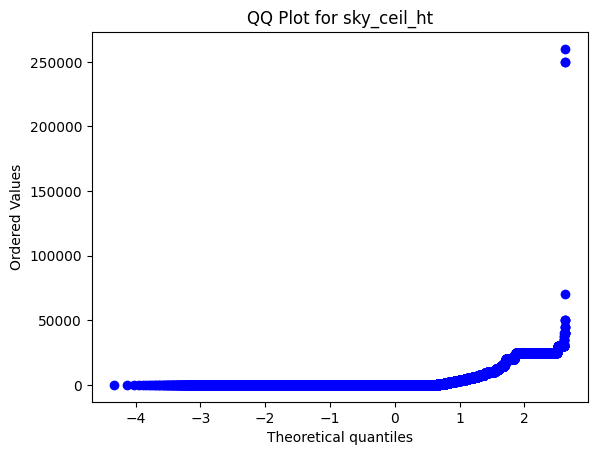

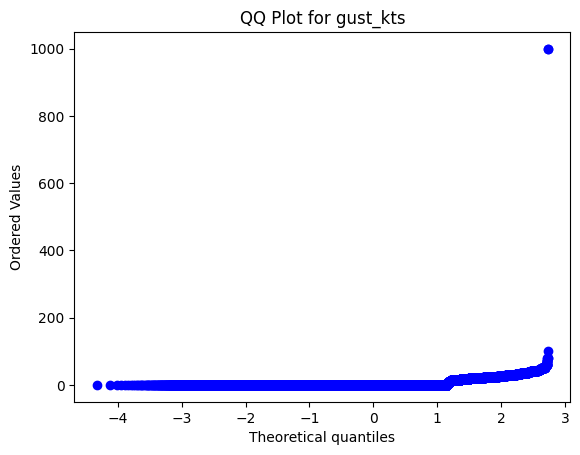

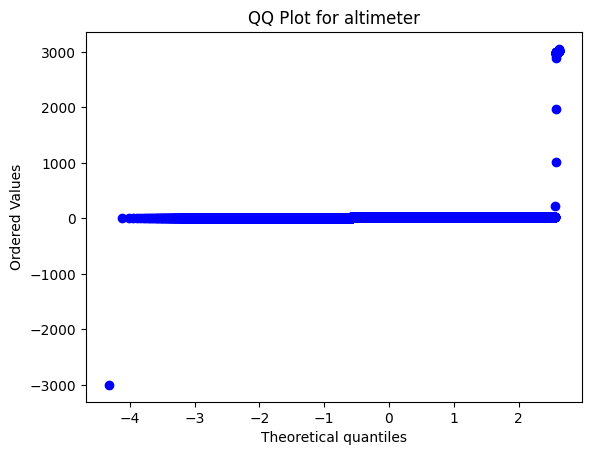

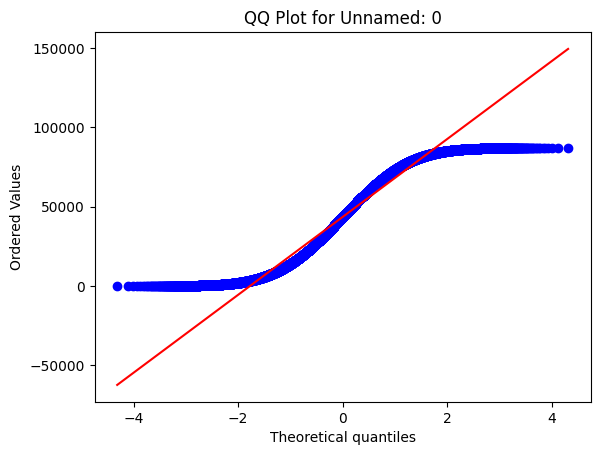

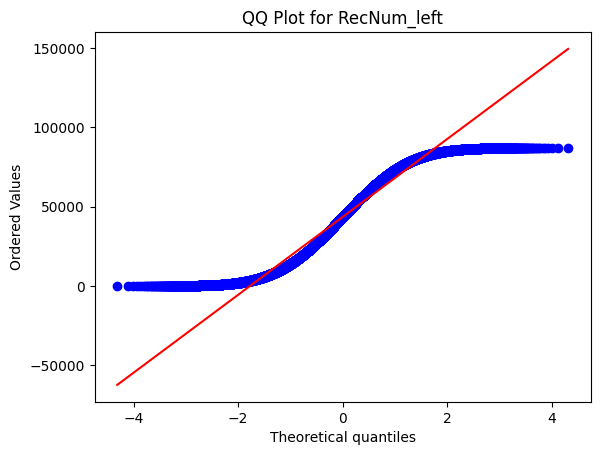

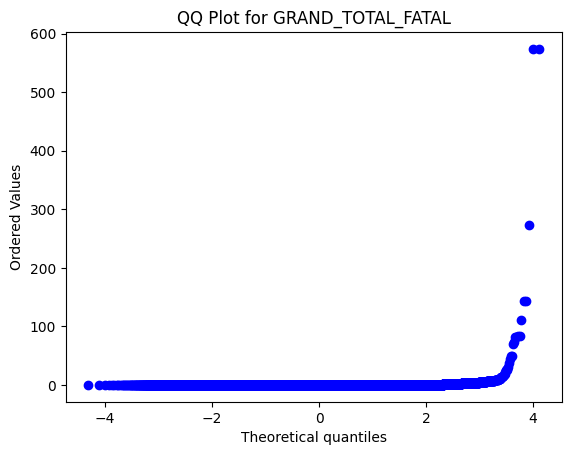

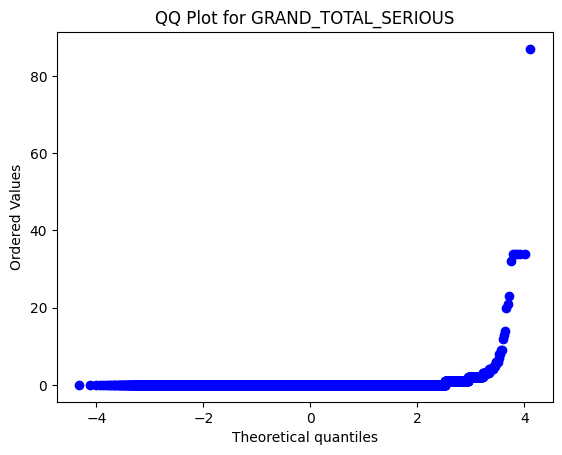

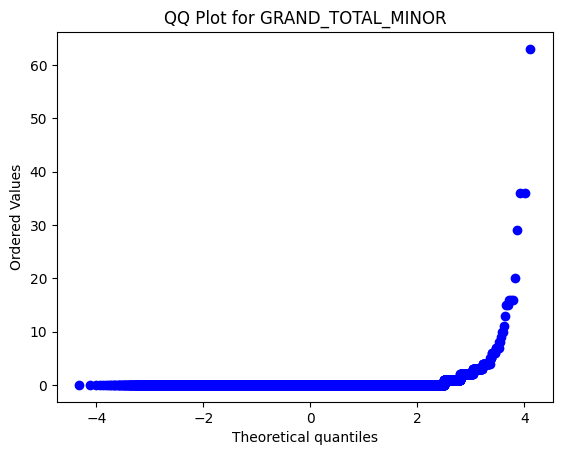

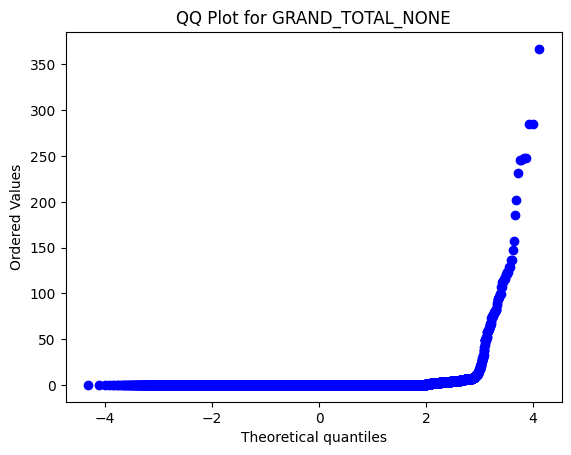

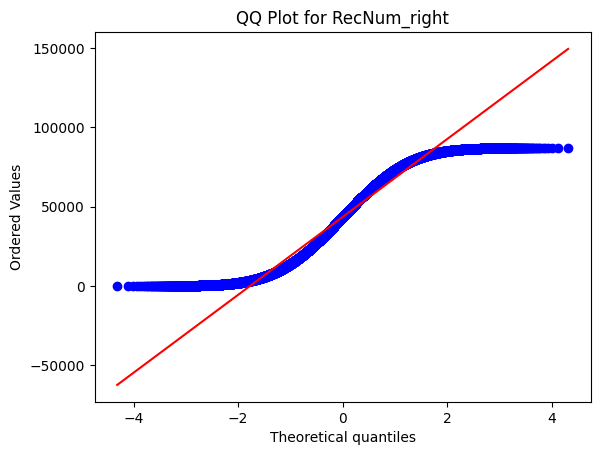

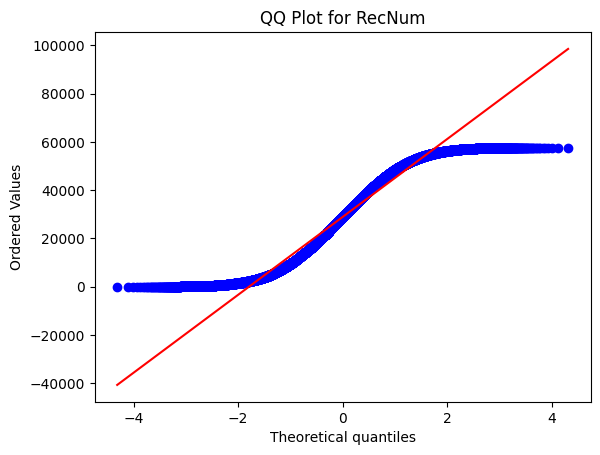

In [84]:
# QQ plot for normality check
def qq_plot(data, column):
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f"QQ Plot for {column}")
    plt.show()

# For data_start_1982_clean
for col in data_start_numerical_columns:
    qq_plot(data_start_1982_clean, col)

# For data_before_1982_clean
for col in data_before_numerical_columns:
    qq_plot(data_before_1982_clean, col)